In [9]:
#Import initial dependencies

import pandas as pd
import pyodbc 

#Establish connection to SQL database

conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=tcp:group1-owner-nu.database.windows.net,1433;'
                      'Database=final-project;'
                      'Persist Security Info=False;'
                      'Uid=GROUPDB1NU;'
                      'Pwd=NU02282021!;'
                      'MultipleActiveResultSets=False;'
                      'Encrypt=Yes;'
                      'TrustServerCertificate=No;'
                      'Connection Timeout=30;')


cursor = conn.cursor()

#Read tables from SQL

initial_df = pd.read_sql("SELECT * FROM dbo.final_table", conn)

initial_df.head()


,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,VintagePrice,VintageRatingPriceRatio,Age,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,Idig GG,2012,German,Riesling,4.3,106,83.95,0.051221,9,4.3,869,83.95,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,Idig GG,2014,German,Riesling,4.1,95,77.95,0.052598,7,4.3,869,77.95,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,Idig GG,2015,German,Riesling,4.3,105,57.55,0.074718,6,4.3,869,57.55,0.074718
3,Abadal Nuat 2015,Abadal,Nuat,2015,None,None,4.1,29,31.99,0.128165,6,3.9,253,31.99,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,Le Domaine Blanco de Guarda,2015,None,None,4.1,149,29.00,0.141379,6,4.2,1424,29.00,0.144828


In [21]:
X = initial_df[["Winery", "WineName", "Year","Region", "RegionalVariety", "VintageRatingCount","VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingCount", "WineRatingPriceRatio"]]
y = initial_df["VintageRating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4593, 11) (4593, 1)


In [22]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
# Drop features below score of 40
clean_df = initial_df.drop(['WineName', 'Region', 'RegionalVariety', 'VintageRatingCount', 'WineRatingCount', 'Age', 'WinePrice'], axis=1)
clean_df.head()

,FullName,Winery,Year,VintageRating,VintagePrice,VintageRatingPriceRatio,WineRating,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,2012,4.3,83.95,0.051221,4.3,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,2014,4.1,77.95,0.052598,4.3,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,2015,4.3,57.55,0.074718,4.3,0.074718
3,Abadal Nuat 2015,Abadal,2015,4.1,31.99,0.128165,3.9,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,2015,4.1,29.00,0.141379,4.2,0.144828


In [39]:
clean_df['Year'] = clean_df['Year'].replace(['N.V.'],'2020').dropna()


In [17]:
clean_df.dtypes

FullName                    object
Winery                      object
Year                       float64
VintageRating              float64
VintagePrice               float64
VintageRatingPriceRatio    float64
WineRating                 float64
WineRatingPriceRatio       float64
dtype: object

In [64]:
# "FullName", "Winery",
X = clean_df[[ "Year", "VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingPriceRatio"]]
y = clean_df["VintageRating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4593, 5) (4593, 1)


In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [69]:
o = StandardScaler()
# help(o.fit_transform)
o.fit_transform(clean_df[["Year", "VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingPriceRatio"]])

array([[-0.41665485, -0.04554303, -0.92034151,  0.79937949, -0.91449465],
       [ 0.09530227, -0.05924629, -0.89524864,  0.79937949, -0.84092295],
       [ 0.35128084, -0.10583738, -0.49211979,  0.79937949, -0.47603031],
       ...,
       [ 1.11921652, -0.0869954 , -0.69054848,  0.22988205, -0.67920521],
       [ 0.09530227, -0.16720515,  0.52227993, -0.90911283,  0.5626328 ],
       [ 1.11921652, -0.18412868,  1.43555664, -0.90911283,  1.33736996]])

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.float64)),
    (OrdinalEncoder(), make_column_selector(dtype_include=object))
)
ct.fit_transform(X)

array([[-0.04554303, -0.92034151,  0.79937949, -0.91449465, 25.        ],
       [-0.05924629, -0.89524864,  0.79937949, -0.84092295, 27.        ],
       [-0.10583738, -0.49211979,  0.79937949, -0.47603031, 28.        ],
       ...,
       [-0.0869954 , -0.69054848,  0.22988205, -0.67920521, 31.        ],
       [-0.16720515,  0.52227993, -0.90911283,  0.5626328 , 27.        ],
       [-0.18412868,  1.43555664, -0.90911283,  1.33736996, 31.        ]])

In [76]:
y.reshape(-1)

array([4.3, 4.1, 4.3, ..., 4.2, 4. , 4.2])

In [80]:
X_encoded = ct.fit_transform(X)
y_encoded = y
lr = LinearRegression()
lr.fit(X_encoded, y_encoded)
lr.score(X_encoded, y_encoded)

0.8777844448765189

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = make_pipeline(ct, LinearRegression())
model.fit(X, y)
model.score(X_test, y_test)

0.8640287025505573

In [29]:
# visualize pipeline
from sklearn import set_config
set_config(display="diagram")
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000242051B7748>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000242051B7B88>)])),
                ('linearregression', LinearRegression())])

In [30]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
# fit model with training data
# model.fit(X_train, y_train)
model.fit(X, y.reshape(-1))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024208132FC8>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000242043C71C8>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# steps that transform input data into a format understod by the model
model.steps

In [78]:
model.score(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

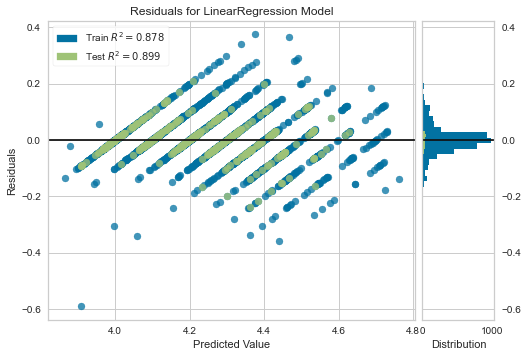

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [86]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [ ]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['VintageRatingPriceRatio', 'VintageRating'])
visualizer.fit_transform(X, y)
visualizer.show()

In [ ]:
print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
ax.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
ax.legend()
ax.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
ax.set_title("Residual Plot")
fig.show()